# Testing a base model

Currently i've chosen keras, as it would be quick to try things out + exam comming up (using keras) on 13th of January

In [1]:
%pip install scikit-learn keras 'tensorflow[and-cuda]' opencv-python python-dotenv pandas sqlalchemy PyMySQL matplotlib scikit-image 
#imgaug

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-02-20 18:47:58.125200: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 18:47:58.142309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740073678.162697  200992 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740073678.168604  200992 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 18:47:58.189213: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import keras
import numpy as np
import pandas as pd
import sys

In [4]:
from FrameLoader import FrameLoader
from DataRepository import DataRepository
from helpers import plot

In [5]:
import os
import psutil

def process_memory():
    "Returns megabytes"
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / 1024 / 1024 / 1024

print(f"Current memory usage: {process_memory()} gigabytes")

Current memory usage: 0.7423248291015625 gigabytes


In [6]:
repo = DataRepository()
repo.VideoNames.head()
# repo.VideoNames.iloc[0]["name"]

connection established, loading frame paths
rel paths of framelabels loaded


folderId    id                                               name
id                                                                     
2214        16  2214  free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
2215        16  2215  free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
1084         5  1084  competition/belgium/SR1/2011-brewsterbayside-s...
1085         5  1085  competition/belgium/SR1/2011-brewsterbayside-s...
1086         5  1086  competition/belgium/SR1/2011-brewsterbayside-s...

In [7]:
frameloader = FrameLoader(repo)

In [8]:
repo.VideoNames.head()

folderId    id                                               name
id                                                                     
2214        16  2214  free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
2215        16  2215  free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
1084         5  1084  competition/belgium/SR1/2011-brewsterbayside-s...
1085         5  1085  competition/belgium/SR1/2011-brewsterbayside-s...
1086         5  1086  competition/belgium/SR1/2011-brewsterbayside-s...

In [9]:
repo.VideoNames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, 2214 to 575
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   folderId  1624 non-null   int64 
 1   id        1624 non-null   int64 
 2   name      1624 non-null   object
dtypes: int64(2), object(1)
memory usage: 50.8+ KB


In [10]:
repo.VideoNames.loc[1319]["name"]

'competition/belgium/DD3/2024-dd3-sipiro-senioren-maud-pkb-j1.mp4'

In [11]:
from DataGeneratorSkills import DataGeneratorSkills

In [12]:
%%time

train_gen = DataGeneratorSkills(
    frameloader=frameloader,
    train_test_val="train",
    dim=(224,224),
    batch_size=1
)


connection established, loading frame paths
rel paths of framelabels loaded
DataGeneratorSkills init done
CPU times: user 7.77 s, sys: 339 ms, total: 8.11 s
Wall time: 11 s


In [13]:
X, y = train_gen.__getitem__(1, normalize=False)
X.shape

(1, 16, 224, 224, 3)

In [14]:
y

{'Type': array([0]),
 'Rotations': array([0.125]),
 'Turner1': array([0]),
 'Turner2': array([0]),
 'Skill': array([6]),
 'Hands': array([0.5]),
 'Feet': array([0.5]),
 'Turntable': array([0.]),
 'BodyRotations': array([1.]),
 'Backwards': array([0]),
 'Sloppy': array([0]),
 'Hard2see': array([0]),
 'Fault': array([0])}

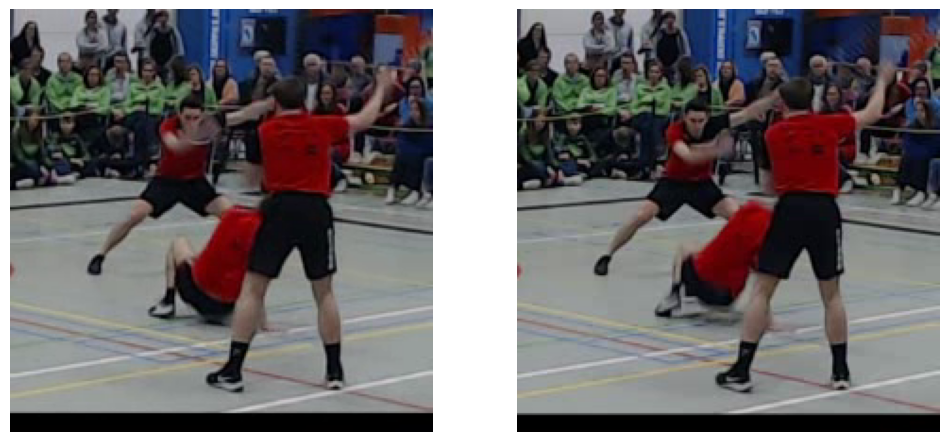

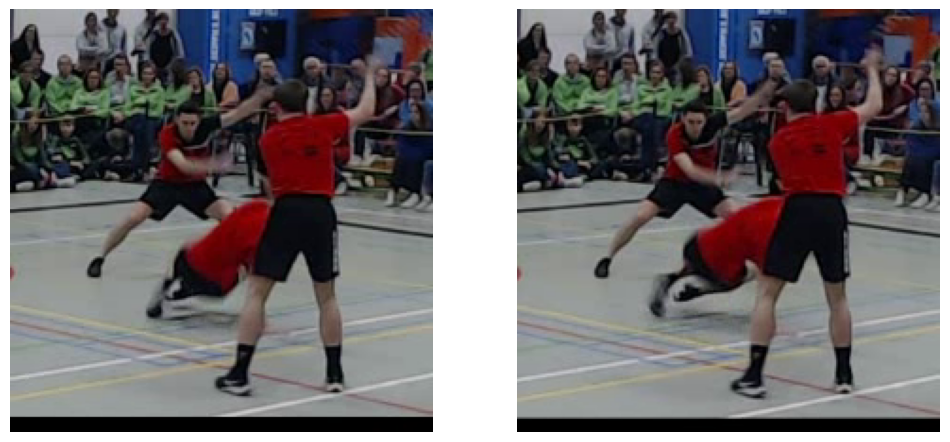

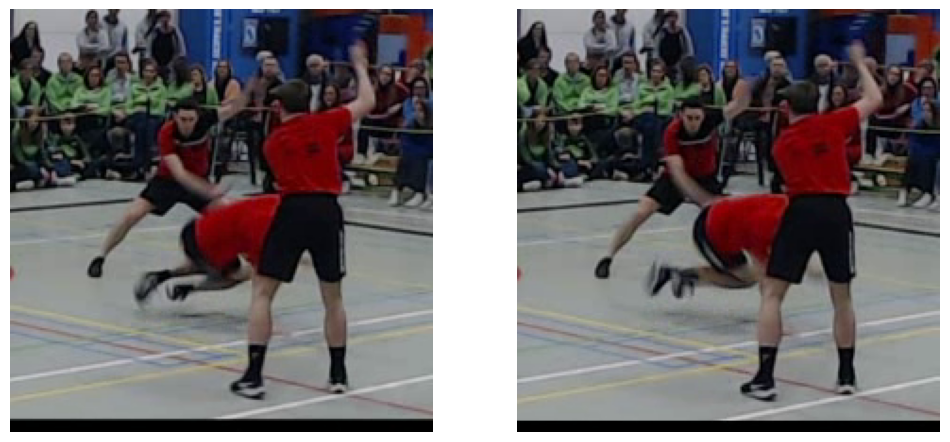

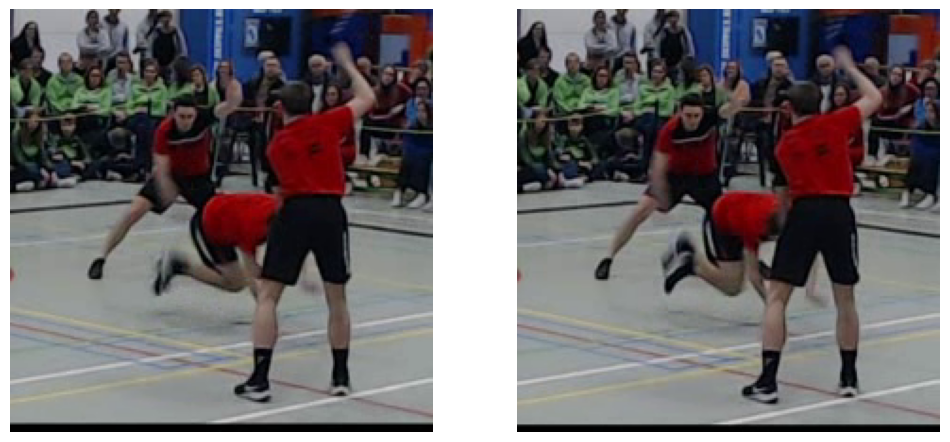

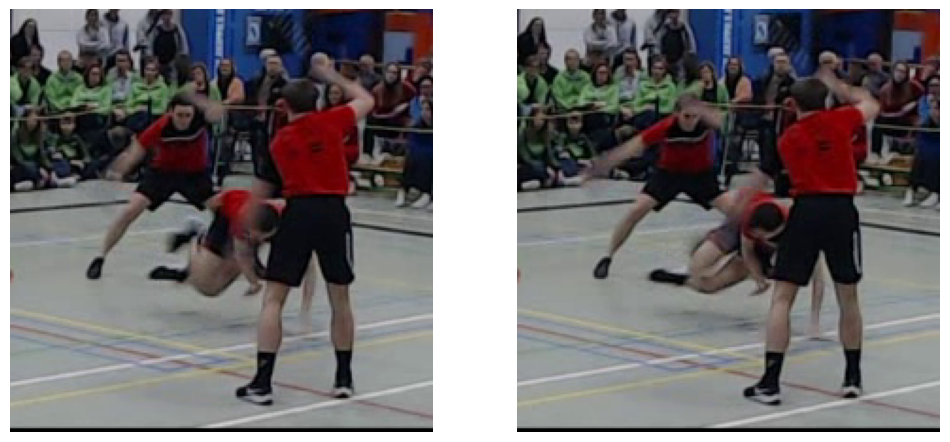

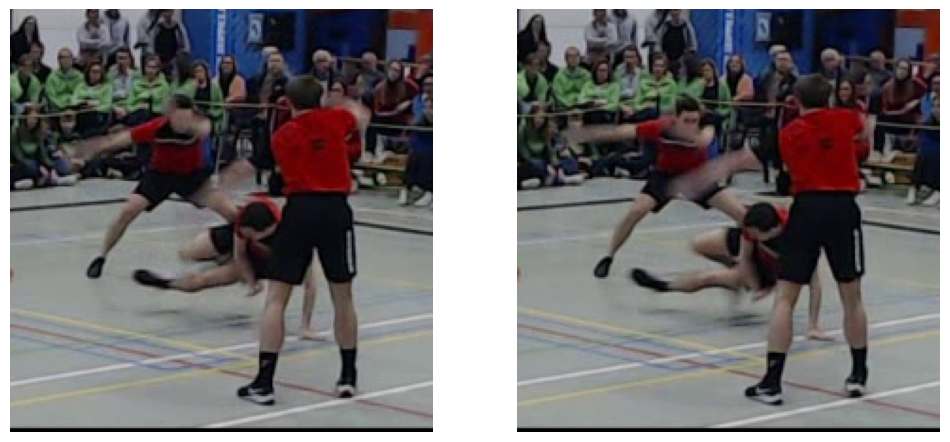

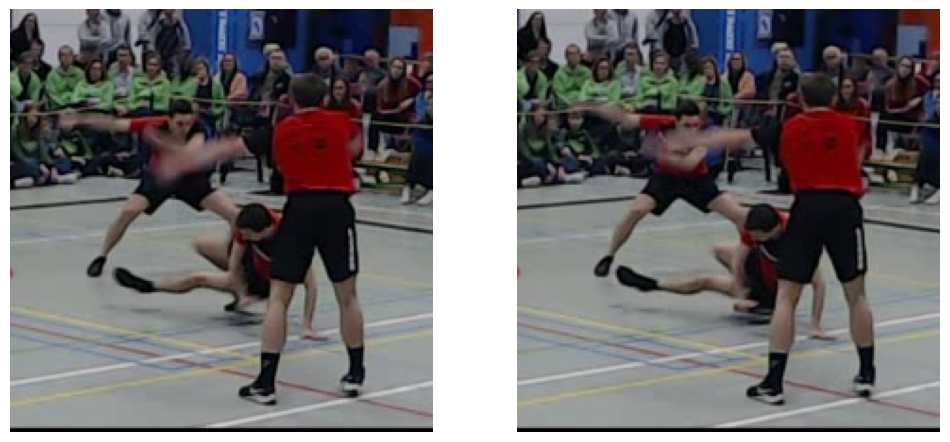

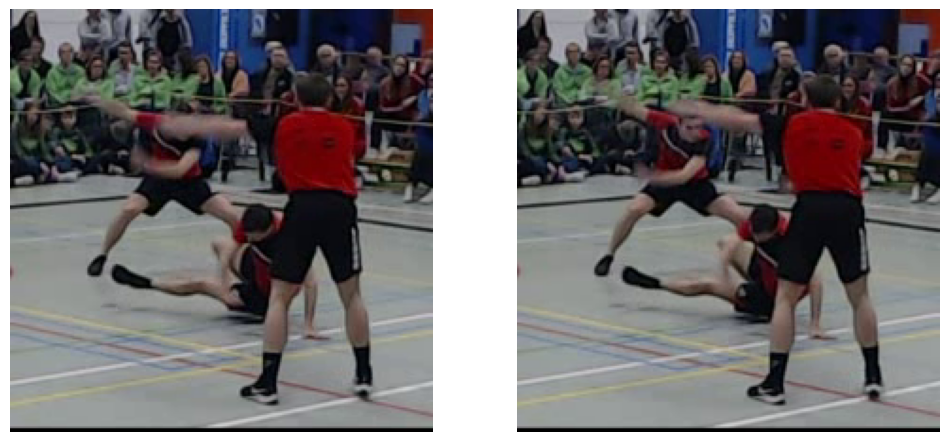

In [15]:
for j in range(X.shape[1]//2):
    plot(X[0, j*2:j*2+2])
